<a href="https://colab.research.google.com/github/AntonStasenok/SalesAi/blob/main/them_model_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install rar

In [ ]:
!rar x "/content/drive/MyDrive/theme_model/text.rar" "/content/drive/MyDrive/theme_model" 

In [ ]:
file = '/content/drive/MyDrive/theme_model/text/1627299662.168874..txt'

#file = '/content/text/text/1619418106.276194..txt'

In [ ]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'windows-1251',
 'confidence': 0.9727833705525966,
 'language': 'Russian'}

In [ ]:
with open(file, encoding = 'windows-1251') as f:
     lines = f.readlines()
lines

In [ ]:
with open('/content/sample_data/1.txt', 'w', encoding = 'utf-8') as fp:
    fp.write(' '.join(lines))

In [ ]:
!pip install pymorphy2

In [ ]:
import nltk
import string
from tqdm import tqdm
import pymorphy2
import pymystem3

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

#mystem = pymystem3.Mystem()
morph = pymorphy2.MorphAnalyzer()
stop_words = nltk.corpus.stopwords.words('russian')

In [ ]:

def text_lemma(text, lemmatizer, stop_words = None, punctuation = True):
  result = list()
  
  if punctuation:
    new_text = nltk.word_tokenize(text.translate(str.maketrans('', '', string.punctuation)))
  else:
    new_text = nltk.word_tokenize(text)
      
  if isinstance(lemmatizer, pymorphy2.analyzer.MorphAnalyzer):
    for word in new_text:
      p = lemmatizer.parse(word)[0]
      result.append(p.normal_form)
  elif isinstance(lemmatizer, pymystem3.mystem.Mystem):
    for word in new_text:
      p = lemmatizer.lemmatize(word)[0]
      result.append(p.normal_form)

  if stop_words:
    new_text_w = [w for w in result if w not in stop_words]
  else:
    new_text_w = result.copy()

  return new_text_w


def dialog_transform(dialogue, lemmatizer, stop_words = None, punctuation = True, to_string = False):
  result = list()
  for sentence in dialogue:
    res = text_lemma(sentence, morph, stop_words)
    if to_string:
      result.append(' '.join(res))
    else:
      result.append(res)
  
  return result

In [ ]:
from os import walk

filenames = next(walk('/content/drive/MyDrive/theme_model/text'), (None, None, []))[2] 
path = '/content/drive/MyDrive/theme_model/text/'

In [ ]:
len(filenames)

1926

In [ ]:
with_stop = list()
dic = list()


for name in tqdm(filenames):
  filename = path + name
  with open(filename, encoding = 'windows-1251') as f:
     lines = f.readlines()

  text = dialog_transform(lines, morph, stop_words)

  tokens = []
  for sent in text:
    if not sent:
      continue
    else:
      tokens += sent
      
  dic.extend(tokens)
  with_stop.append(len(tokens))

100%|██████████| 1926/1926 [07:21<00:00,  4.36it/s]


(0.0, 190.0)

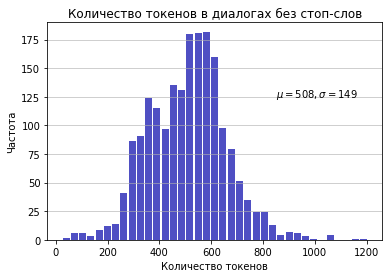

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mean = int(np.mean(with_stop))
std = int(np.std(with_stop))

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=with_stop, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Количество токенов')
plt.ylabel('Частота')
plt.title('Количество токенов в диалогах без стоп-слов')
plt.text(850, 125, f'$\mu={mean}, \sigma={std}$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 190.0)

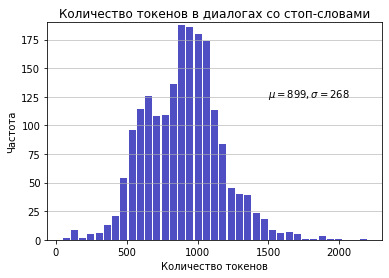

In [ ]:
mean = int(np.mean(without_stop))
std = int(np.std(without_stop))

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=without_stop, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Количество токенов')
plt.ylabel('Частота')
plt.title('Количество токенов в диалогах со стоп-словами')
plt.text(1500, 125, f'$\mu={mean}, \sigma={std}$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [ ]:
len(set(dic))

21067